#  Full PipeLine to Create A "K-NN" Model 
the complete structure of a machine‑learning pipeline, from installing dependencies to visualizing outputs, Importing a model , train and test it , Evaluate it .

# 1. Installing libraries


In [ ]:
# All

# 2. Importing libraries
Importing All librairies that we need 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import joblib   
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 3 Dataset

## 3.1 Importing the dataset Housing
Load your dataset (CSV, Parquet, SQL, etc.).



In [10]:

#Importing the dataset
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv"
df_linear = pd.read_csv(url)
# Display the first few rows of the dataset
print(df_linear.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

### 3.2 Data exploration and cleaning(Housing)
Inspect statistical summaries and handle missing values or outliers.

In [11]:
# Quick data overview
df_linear.info()
df_linear.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### 3.3 Check for Missing VALUES
Count how many Missing Values (null) Exist in each column

In [12]:
df_linear.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

# 4 Visualisation Of Data

## 4.1 Univariate Analysis

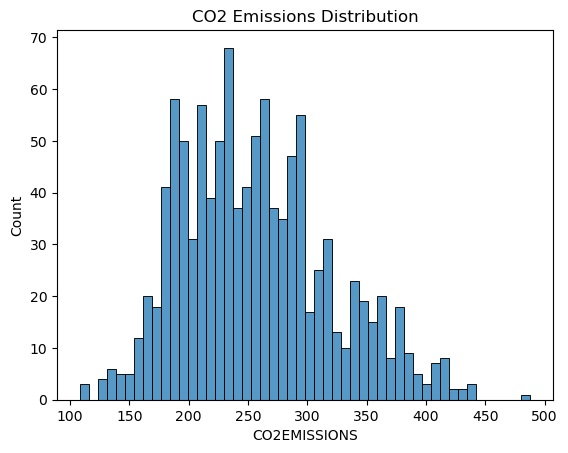

In [13]:

sns.histplot(df_linear['CO2EMISSIONS'], bins=50)
plt.title('CO2 Emissions Distribution')
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

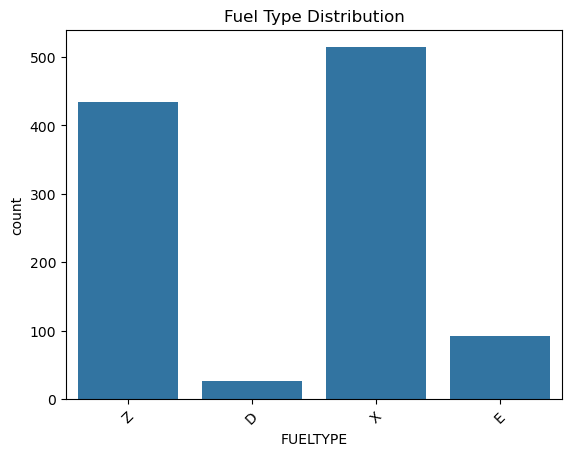

In [14]:
sns.countplot(x='FUELTYPE', data=df_linear)
plt.title('Fuel Type Distribution')
plt.xticks(rotation=45) 

## 4.2 Bivariate - Multivariate Analysis 


Text(0.5, 1.0, 'Engine Size vs CO2 Emissions')

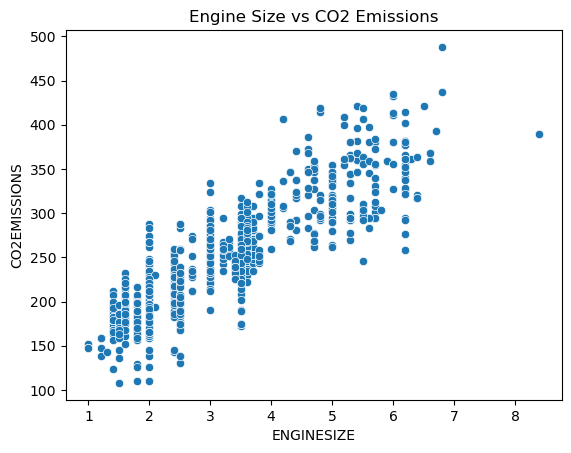

In [15]:
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df_linear)
plt.title('Engine Size vs CO2 Emissions')

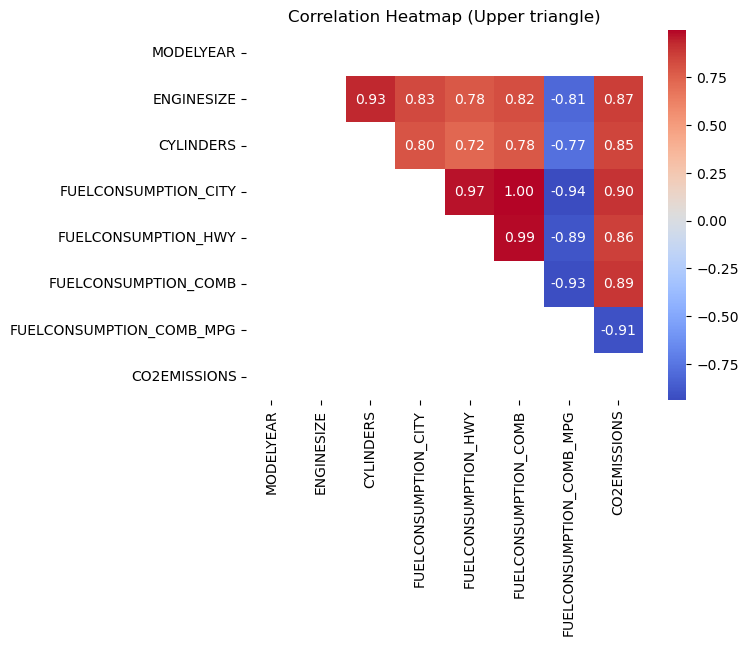

In [16]:

# Calcul de la matrice de corrélation
corr_matrix = df_linear.corr()

# Création du masque pour cacher la partie inférieure
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

# Heatmap avec le masque
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)

plt.title('Correlation Heatmap (Upper triangle)')
plt.show()


# 5 Preprocessing The DATA


## 5.1 Handle Missing Values

In [17]:
#Nothing to do here, just a comment to keep the code structure

## 5.2 Enconding Categorical Variables 


In [18]:
# Définir les colonnes
categorical_cols = ['MAKE', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']
numerical_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
                  'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
                  'FUELCONSUMPTION_COMB', 'MODELYEAR']

# Cible
target_col = 'CO2EMISSIONS'

##  5.3  Feature Scaling + full preprocessor 

In [19]:


# Numeric pipeline: scale numerical columns
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df_linear[numerical_cols])
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numerical_cols)
print(numerical_scaled.head())

# Categorical pipeline: one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')


   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0   -0.951292  -0.998969             -0.828558            -0.993341   
1   -0.668653  -0.998969             -0.511433            -0.635329   
2   -1.304591  -0.998969             -1.779932            -1.315552   
3    0.108606   0.114242             -0.145519            -0.134112   
4    0.108606   0.114242             -0.291885            -0.277317   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB  MODELYEAR  
0             -0.884304             -0.884304        0.0  
1             -0.568571             -0.568571        0.0  
2             -1.630581             -1.630581        0.0  
3             -0.138027             -0.138027        0.0  
4             -0.281542             -0.281542        0.0  


In [20]:
#create a categorical pipeline : one-hot encoding and set handle_unknown='ignore' to prevent errors with unseen labels and use sparse=False to return a dense DataFrame

categorical_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
categorical_encoded = categorical_encoder.fit_transform(df_linear[categorical_cols])
categorical_encoded = pd.DataFrame(
    categorical_encoded,
    columns=categorical_encoder.get_feature_names_out(categorical_cols),
    index=df_linear.index
)
print(categorical_encoded.head())

   MAKE_ACURA  MAKE_ASTON MARTIN  MAKE_AUDI  MAKE_BENTLEY  MAKE_BMW  \
0         1.0                0.0        0.0           0.0       0.0   
1         1.0                0.0        0.0           0.0       0.0   
2         1.0                0.0        0.0           0.0       0.0   
3         1.0                0.0        0.0           0.0       0.0   
4         1.0                0.0        0.0           0.0       0.0   

   MAKE_BUICK  MAKE_CADILLAC  MAKE_CHEVROLET  MAKE_CHRYSLER  MAKE_DODGE  ...  \
0         0.0            0.0             0.0            0.0         0.0  ...   
1         0.0            0.0             0.0            0.0         0.0  ...   
2         0.0            0.0             0.0            0.0         0.0  ...   
3         0.0            0.0             0.0            0.0         0.0  ...   
4         0.0            0.0             0.0            0.0         0.0  ...   

   TRANSMISSION_AV6  TRANSMISSION_AV7  TRANSMISSION_AV8  TRANSMISSION_M5  \
0               

In [21]:
# Remove duplicate column names from numerical_cols
numerical_cols_unique = list(dict.fromkeys(numerical_cols))

# Combine both pipelines using ColumnTransformer with correct columns for df_linear
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_unique),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_cols)
    ]
)

# Fit and transform the data using the pipeline
X_processed = preprocessor.fit_transform(df_linear[numerical_cols_unique + categorical_cols])


In [22]:
# Convert the result to a new DataFrame and extract feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()
X_Scaled_df = pd.DataFrame(X_processed, columns=feature_names)

X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())

In [23]:
#convert scaled output to dataframe for visualization
print(X_processed_df.head())

   num__ENGINESIZE  num__CYLINDERS  num__FUELCONSUMPTION_CITY  \
0        -0.951292       -0.998969                  -0.828558   
1        -0.668653       -0.998969                  -0.511433   
2        -1.304591       -0.998969                  -1.779932   
3         0.108606        0.114242                  -0.145519   
4         0.108606        0.114242                  -0.291885   

   num__FUELCONSUMPTION_HWY  num__FUELCONSUMPTION_COMB  num__MODELYEAR  \
0                 -0.993341                  -0.884304             0.0   
1                 -0.635329                  -0.568571             0.0   
2                 -1.315552                  -1.630581             0.0   
3                 -0.134112                  -0.138027             0.0   
4                 -0.277317                  -0.281542             0.0   

   cat__MAKE_ACURA  cat__MAKE_ASTON MARTIN  cat__MAKE_AUDI  cat__MAKE_BENTLEY  \
0              1.0                     0.0             0.0                0.0   
1 

#  6  Split the data 

##  6.1  seperate features and target variable  

In [24]:
#separate features and target variable
y = df_linear[target_col]
X = df_linear.drop(columns=[target_col])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

##  6.2 Split the dataset into training part and testing part

In [25]:
# Use train_test_split to create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Scaled_df, y, test_size=0.2, random_state=42)


##  6.3  Display Dimension to verify the split 

In [26]:
# verifying the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (853, 87) (853,)
Testing set shape: (214, 87) (214,)


In [27]:
# Compute totals and percentages
total_rows = len(X_Scaled_df)
train_rows = len(X_train)
test_rows = len(X_test)

train_pct = train_rows / total_rows * 100
test_pct = test_rows / total_rows * 100

print(f"Total rows: {total_rows}")
print(f"Train rows: {train_rows} ({train_pct:.2f}%)")
print(f"Test rows: {test_rows} ({test_pct:.2f}%)")

Total rows: 1067
Train rows: 853 (79.94%)
Test rows: 214 (20.06%)


In [28]:
#Calculate the total of number of samples, and the number of samples in the training and testing sets
train_pct = len(X_train) / len(X_Scaled_df) * 100
test_pct = len(X_test) / len(X_Scaled_df) * 100

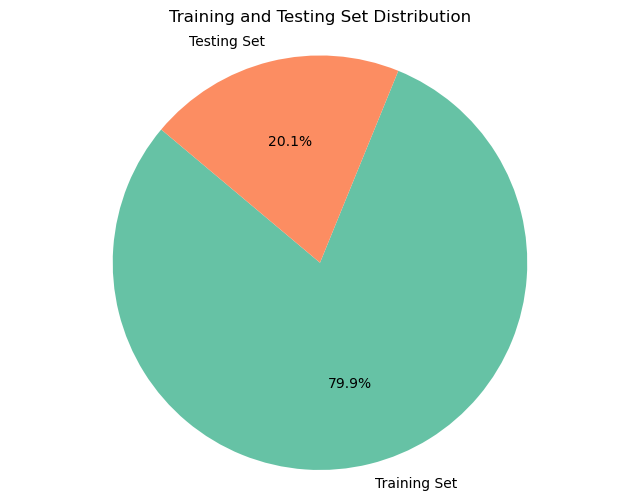

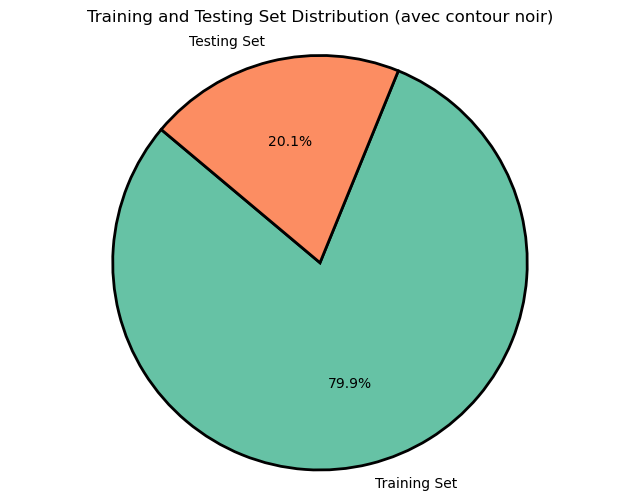

In [29]:
#step define the lables and size of the pie chart
labels = ['Training Set', 'Testing Set']
sizes = [train_pct, test_pct]
colors = ['#66c2a5', '#fc8d62']
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Training and Testing Set Distribution')
plt.show()
# Ajouter un contour noir autour des parts du camembert
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
    wedgeprops=dict(edgecolor='black', linewidth=2)
)
plt.axis('equal')
plt.title('Training and Testing Set Distribution (avec contour noir)')
plt.show()

#  7 Choosing THE K-NN MODEL 

##  7.1 Definitions and creation of PIPELINE 


In [ ]:
from sklearn.neighbors import KNeighborsRegressor


rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(
        n_neighbors=5,      # nombre de voisins par défaut, tu peux l'ajuster
        weights='uniform',  # ou 'distance'
        n_jobs=-1
    ))
])


##  7.2 Model training  


In [33]:
print("Colonnes disponibles dans X_train :", X_train.columns.tolist())


Colonnes disponibles dans X_train : ['num__ENGINESIZE', 'num__CYLINDERS', 'num__FUELCONSUMPTION_CITY', 'num__FUELCONSUMPTION_HWY', 'num__FUELCONSUMPTION_COMB', 'num__MODELYEAR', 'cat__MAKE_ACURA', 'cat__MAKE_ASTON MARTIN', 'cat__MAKE_AUDI', 'cat__MAKE_BENTLEY', 'cat__MAKE_BMW', 'cat__MAKE_BUICK', 'cat__MAKE_CADILLAC', 'cat__MAKE_CHEVROLET', 'cat__MAKE_CHRYSLER', 'cat__MAKE_DODGE', 'cat__MAKE_FIAT', 'cat__MAKE_FORD', 'cat__MAKE_GMC', 'cat__MAKE_HONDA', 'cat__MAKE_HYUNDAI', 'cat__MAKE_INFINITI', 'cat__MAKE_JAGUAR', 'cat__MAKE_JEEP', 'cat__MAKE_KIA', 'cat__MAKE_LAMBORGHINI', 'cat__MAKE_LAND ROVER', 'cat__MAKE_LEXUS', 'cat__MAKE_LINCOLN', 'cat__MAKE_MASERATI', 'cat__MAKE_MAZDA', 'cat__MAKE_MERCEDES-BENZ', 'cat__MAKE_MINI', 'cat__MAKE_MITSUBISHI', 'cat__MAKE_NISSAN', 'cat__MAKE_PORSCHE', 'cat__MAKE_RAM', 'cat__MAKE_ROLLS-ROYCE', 'cat__MAKE_SCION', 'cat__MAKE_SMART', 'cat__MAKE_SRT', 'cat__MAKE_SUBARU', 'cat__MAKE_TOYOTA', 'cat__MAKE_VOLKSWAGEN', 'cat__MAKE_VOLVO', 'cat__VEHICLECLASS_COMPACT

In [ ]:
# Fit the model
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform', n_jobs=-1)
knn_regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

#  8 The result   

##  8.1 Statistic result   

In [36]:
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R²   : {r2:,.3f}")

MAE  : 1.37
RMSE : 5.12
R²   : 0.994


##  8.2 Visualisation of the résult in a PLOT

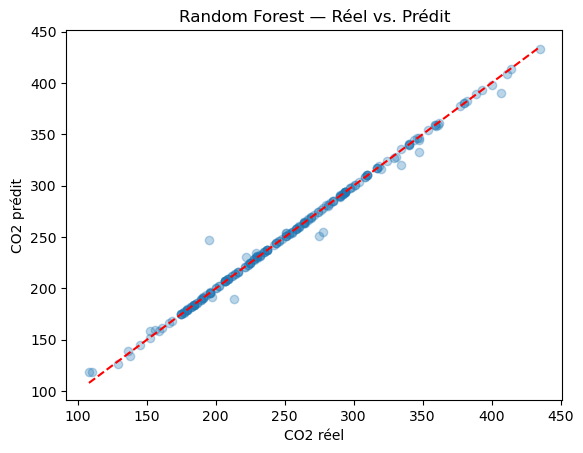

In [ ]:


plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('CO2 réel')
plt.ylabel('CO2 prédit')
plt.title('K-NN — Réel vs. Prédit')
plt.show()


#  9 Saving the Model

In [ ]:
# Save the trained KNN regressor model to a file
joblib.dump(knn_regressor, "knn_co2_model.pkl")

R² Linear Regression: 0.9893575197640174


#  Conclusion







The trained Random Forest model predicts CO₂ emissions very accurately, with an R² score of ... and a MAE of ... g. The scatter plot shows a strong correlation between actual and predicted values. This model can be used to estimate the carbon impact of new vehicles based on their characteristics.